In [1]:
#  to get automatic reloading
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.plots import *
from fastai.io import get_data
from fastai.conv_learner import *

In [2]:
PATH = "data/emotionet/"
label_csv = f'{PATH}train.csv'

In [3]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)
n, len(val_idxs)

(141, 28)

In [4]:
f_model = resnet34
sz = 256

In [5]:
tfms = tfms_from_model(f_model, sz)
data = ImageClassifierData.from_csv(PATH, 'imgs_sample', label_csv, tfms=tfms, val_idxs=val_idxs)

In [6]:
x,y = next(iter(data.val_dl))
list(zip(data.classes, y[1]))

[('AU1', 0.0),
 ('AU12', 1.0),
 ('AU17', 0.0),
 ('AU2', 0.0),
 ('AU20', 0.0),
 ('AU25', 1.0),
 ('AU26', 0.0),
 ('AU4', 0.0),
 ('AU5', 0.0),
 ('AU6', 1.0),
 ('AU9', 0.0)]

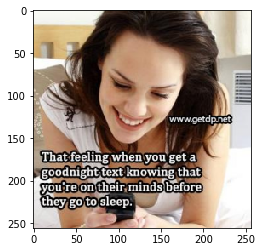

In [7]:
plt.imshow(data.val_ds.denorm(to_np(x))[1])

In [8]:
learn = ConvLearner.pretrained(f_model, data, precompute=True)

In [9]:
learn.fit(0.01,2)

epoch      trn_loss   val_loss   <lambda>                
    0      0.810309   0.775633   0.506494  
    1      0.812845   0.7435     0.532468                



[array([0.7435]), 0.5324675440788269]

In [10]:
data.val_y[1]

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
data.classes

['AU1',
 'AU12',
 'AU17',
 'AU2',
 'AU20',
 'AU25',
 'AU26',
 'AU4',
 'AU5',
 'AU6',
 'AU9']

In [12]:
list(zip(data.classes, data.val_y[1]))

[('AU1', 0.0),
 ('AU12', 1.0),
 ('AU17', 0.0),
 ('AU2', 0.0),
 ('AU20', 0.0),
 ('AU25', 1.0),
 ('AU26', 0.0),
 ('AU4', 0.0),
 ('AU5', 0.0),
 ('AU6', 1.0),
 ('AU9', 0.0)]

In [13]:
log_preds = learn.predict()
log_preds.shape

(28, 11)

In [14]:
def get_labels(a): return [data.classes[o] for o in a.nonzero()[0]]

In [15]:
preds_arr = learn.TTA()
preds_avg = np.mean(preds_arr,0)
test = np.mean(preds_avg,0)

In [41]:
log_preds = learn.predict()
test = log_preds
test.shape

(28, 11)

['AU1', 'AU12', 'AU17', 'AU2', 'AU20', 'AU25', 'AU26', 'AU4', 'AU5', 'AU6', 'AU9'] [ True  True  True  True  True  True  True  True  True  True  True] [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


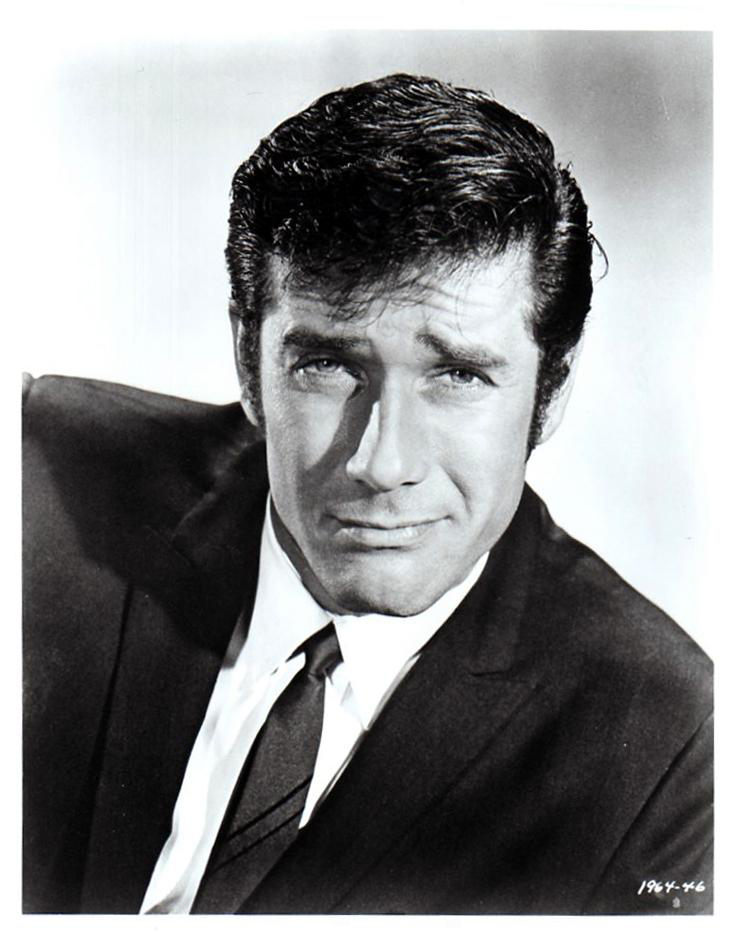

In [51]:
lbls = test>0.2
idx = 5
print(get_labels(lbls[idx]),lbls[idx], data.val_y[idx])
PIL.Image.open(PATH+data.val_dl.dataset.fnames[idx]).convert('RGB')

In [67]:
# binarylbls = 1*lbls[1,:]
binarylbls = lbls.astype(float)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [76]:
for i in range(28):
    print(binarylbls[i,:]);print(data.val_y[i,:]);print('*************************')    
    if np.all(binarylbls[i,:] == data.val_y[i,:]):
        print(binarylbls[i,:],data.val_y[i,:],'*****')

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
*************************
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
*************************
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
*************************
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
*************************
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
*************************
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
*************************
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
*************************
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
*************************
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
*************************
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
*************************
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1

In [87]:
data = ImageClassifierData.from_csv(PATH, 'imgs_sample', label_csv, bs=24, tfms=tfms, val_idxs=val_idxs)
learn = ConvLearner.pretrained(f_model, data, precompute=True)

In [88]:
lrf = learn.lr_find()

epoch      trn_loss   val_loss   <lambda>                
    0      0.822994   0.617861   0.694805  



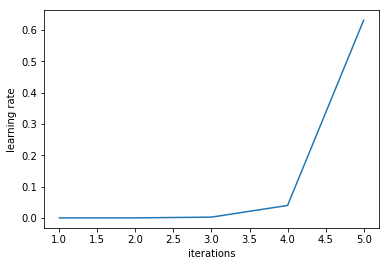

In [89]:
learn.sched.plot_lr()

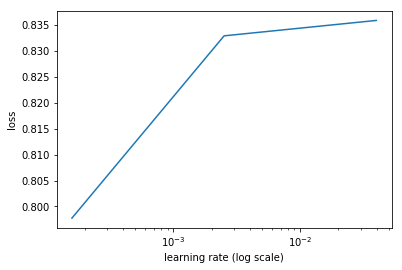

In [91]:
learn.sched.plot(n_skip=1, n_skip_end=1)

In [92]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [93]:
def get_augs():
    data = ImageClassifierData.from_csv(PATH, 'imgs_sample', label_csv, tfms=tfms, val_idxs=val_idxs, bs=24)
    return data.trn_ds.denorm(x)[1]

In [94]:
ims = np.stack([get_augs() for i in range(6)])

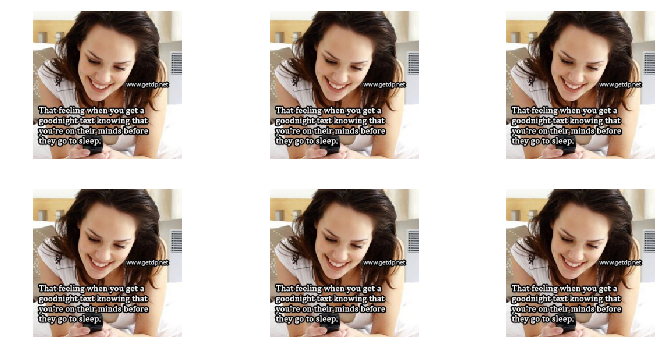

In [96]:
plots(ims, rows=2)

In [100]:
data = ImageClassifierData.from_csv(PATH, 'imgs_sample', label_csv, tfms=tfms)
learn = ConvLearner.pretrained(f_model, data, precompute=True)

In [101]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   <lambda>                
    0      0.824841   0.810302   0.519481  



[array([0.8103]), 0.5194805264472961]

In [102]:
learn.precompute=False

In [103]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                
    0      0.827307   0.775124   0.522727  
    1      0.830261   0.760692   0.525974                
    2      0.834637   0.751553   0.493506                



[array([0.75155]), 0.4935064911842346]

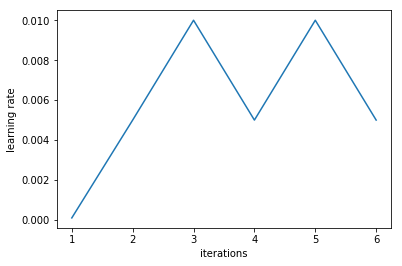

In [104]:
learn.sched.plot_lr()

**fine tuning and differential learning rate annealing**

In [105]:
learn.unfreeze()

In [106]:
lr=np.array([1e-4,1e-3,1e-2])

In [107]:
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                
    0      0.825189   0.745732   0.496753  
    1      0.817271   0.742615   0.506494                
    2      0.820316   0.74427    0.474026                
    3      0.823391   0.740491   0.480519                
    4      0.827061   0.735073   0.480519                
    5      0.823522   0.733607   0.480519                
    6      0.821053   0.735347   0.483766                



[array([0.73535]), 0.48376622796058655]

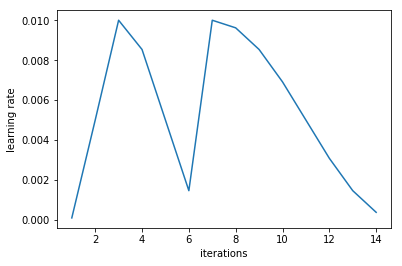

In [108]:
learn.sched.plot_lr()

In [109]:
log_preds,y=learn.TTA()
# probs=np.mean(np.exp(log_preds),0)
probs=np.mean((log_preds),0)

In [125]:
probs_ = 0*probs
probs_[probs>0.5]=1

array([0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [128]:
accuracynp = (probs_==y).mean()
accuracynp

0.525974025974026

In [130]:
for i in range(28):
#     print(binarylbls[i,:]);print(data.val_y[i,:]);print('*************************')    
    if np.all(probs_[i,:] == y[i,:]):
        print(i, probs_[i,:],y[i,:],'*****')

22 [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.] [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.] *****


In [139]:
classes_description = ['inner_brow_raiser', 'lip_corner_puller', 'chin_raiser', 'outer_brow_raiser', 'lip_stretching', 'lips_part', 'jaw_drop', 'brow_lowerer', 'upper_lid_raiser', 'chick_raiser', 'node_wrinkle']
def get_labels_desc(a): return [classes_description[o] for o in a.nonzero()[0]]

['AU1', 'AU12', 'AU17', 'AU25', 'AU4']
['inner_brow_raiser', 'lip_corner_puller', 'chin_raiser', 'lips_part', 'brow_lowerer']


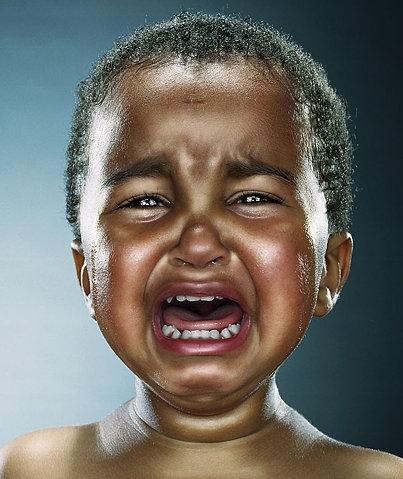

In [140]:
idx = 22
print(get_labels(probs_[idx]))
print(get_labels_desc(probs_[idx]))
PIL.Image.open(PATH+data.val_dl.dataset.fnames[idx]).convert('RGB')

['AU26', 'AU9'] 
 ['AU25']
['jaw_drop', 'node_wrinkle'] 
 ['lips_part']


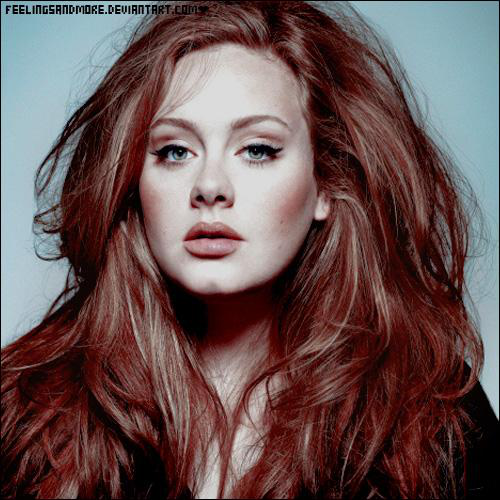

In [145]:
idx = 23
print(get_labels(probs_[idx]),'\n',get_labels(y[idx]))
print(get_labels_desc(probs_[idx]), '\n', get_labels_desc(y[idx]))
PIL.Image.open(PATH+data.val_dl.dataset.fnames[idx]).convert('RGB')